In [1]:
import pandas as pd
data=pd.read_csv('file_bookrecc.csv')
print(data.shape)
data.head(10)

(405466, 7)


,Sno,ISBN,bookTitle,bookAuthor,Publisher,user_ID,bookRating
0,0,195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,2,0
1,1,2005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,8,5
2,2,60973129,Decision in Normandy,Carlo D'Este,HarperPerennial,8,0
3,3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,8,0
4,4,393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,8,0
5,5,399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,8,0
6,6,425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,Berkley Publishing Group,8,0
7,7,671870432,PLEADING GUILTY,Scott Turow,Audioworks,8,0
8,8,679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,Random House,8,0
9,9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,Scribner,8,5


In [2]:
data.columns



Index(['Sno', 'ISBN', 'bookTitle', 'bookAuthor', 'Publisher', 'user_ID',
       'bookRating'],
      dtype='object')

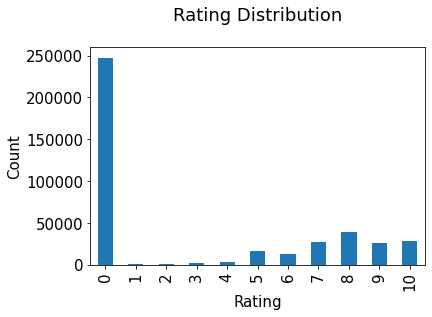

In [3]:
import matplotlib.pyplot as plt
plt.rc("font", size=15)
data.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [4]:
import matplotlib.pyplot as plt
from math import exp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [5]:


columns = [ 'Publisher', 'bookAuthor','Sno']
combine_book_rating = data.drop(columns, axis=1)
combine_book_rating.head()

,ISBN,bookTitle,user_ID,bookRating
0,195153448,Classical Mythology,2,0
1,2005018,Clara Callan,8,5
2,60973129,Decision in Normandy,8,0
3,374157065,Flu: The Story of the Great Influenza Pandemic...,8,0
4,393045218,The Mummies of Urumchi,8,0


In [6]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Beyond IBM: Leadership Marketing and Finance ...,1
2,Earth Prayers From around the World: 365 Pray...,5
3,Final Fantasy Anthology: Official Strategy Gu...,4
4,It Takes Two,2


In [7]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,ISBN,bookTitle,user_ID,bookRating,totalRatingCount
0,195153448,Classical Mythology,2,0,1
1,2005018,Clara Callan,8,5,10
2,60973129,Decision in Normandy,8,0,3
3,374157065,Flu: The Story of the Great Influenza Pandemic...,8,0,7
4,393045218,The Mummies of Urumchi,8,0,1


In [8]:

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   49835.000
mean        8.136
std        22.810
min         1.000
25%         1.000
50%         3.000
75%         7.000
max      1628.000
Name: totalRatingCount, dtype: float64


In [9]:

popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,ISBN,bookTitle,user_ID,bookRating,totalRatingCount
5,399135782,The Kitchen God's Wife,8,0,204
19,786868716,The Five People You Meet in Heaven,11400,9,297
20,151008116,Life of Pi,11400,6,417
21,671021001,She's Come Undone (Oprah's Book Club),11400,0,328
22,312195516,The Red Tent (Bestselling Backlist),11400,7,483


In [10]:
rating_popular_book.shape



(141165, 5)

In [11]:
from scipy.sparse import csr_matrix
rating_popular_book = rating_popular_book.drop_duplicates(['user_ID', 'bookTitle'])
rating_popular_book_pivot = rating_popular_book.pivot(index = 'bookTitle', columns = 'user_ID', values = 'bookRating').fillna(0)
rating_popular_book_matrix = csr_matrix(rating_popular_book_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(rating_popular_book_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [12]:
rating_popular_book_pivot.head()

user_ID,8,9,14,16,17,26,32,39,42,44,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2010: Odyssey Two,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
24 Hours,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2nd Chance,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [31]:
import numpy as np

query_index = np.random.choice(rating_popular_book_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(rating_popular_book_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

879


In [32]:

rating_popular_book_pivot.index[query_index]

'The Bear and the Dragon (Jack Ryan Novels)'

In [33]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_popular_book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Bear and the Dragon (Jack Ryan Novels):

1: Plum Island, with distance of 0.8321153070116021:
2: Rainbow Six, with distance of 0.8399881995846805:
3: Outbreak, with distance of 0.8540546446999334:
4: Patriot Games (Jack Ryan Novels), with distance of 0.8628255849860114:
5: Debt of Honor (Jack Ryan Novels), with distance of 0.8738412167938322:


In [5]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Title']= label_encoder.fit_transform(data['Title']) 
data['Author']= label_encoder.fit_transform(data['Author'])
data['Publisher']= label_encoder.fit_transform(data['Publisher']) 
data['Rating']= label_encoder.fit_transform(data['Rating']) 

data['Title'].unique() 


array([ 7460,  7443,  9715, ..., 25899, 25806, 17142])

In [6]:
data["Author"]= data["Author"].astype(float) 
data["Rating"]= data["Rating"].astype(float) 
data["Publisher"]= data["Publisher"].astype(float) 
data["Title"]= data["Title"].astype(float) 
data["Sno"]= data["Sno"].astype(float) 
data['ISBN'] = pd.to_numeric(data['ISBN'],errors='coerce')
data["User_ID"]= data["User_ID"].astype(float) 


In [7]:
empDfObj = pd.DataFrame(data, columns=['Title', 'Publisher', 'Author', 'Rating'])
dataTypeSeries = empDfObj.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)


Data type of each column of Dataframe :
Title        float64
Publisher    float64
Author       float64
Rating       float64
dtype: object


In [8]:
np.all(np.isfinite(data['ISBN']))

False

In [9]:


data.replace([np.inf, -np.inf], np.nan, inplace=True)
  

data.dropna(inplace=True)

In [10]:
np.all(np.isfinite(data['ISBN']))

True

In [11]:
np.nan_to_num(data['ISBN'])

array([1.95153448e+08, 2.00501800e+06, 6.09731290e+07, ...,
       9.10046715e+09, 9.10044117e+09, 9.15183107e+09])

In [12]:
x=data.iloc[:,1:6]
y=data.Rating
x

,ISBN,Title,Author,Publisher,User_ID
0,1.951534e+08,7460.0,16061.0,3426.0,2.0
1,2.005018e+06,7443.0,19943.0,2090.0,8.0
2,6.097313e+07,9715.0,3273.0,2091.0,8.0
3,3.741571e+08,13918.0,8439.0,1648.0,8.0
4,3.930452e+08,41185.0,6272.0,4942.0,8.0
...,...,...,...,...,...
405461,6.848472e+08,42322.0,15270.0,4654.0,102332.0
405462,8.624186e+08,27341.0,8737.0,3788.0,29234.0
405463,9.100467e+09,25899.0,17584.0,675.0,29238.0
405464,9.100441e+09,25806.0,10599.0,676.0,29238.0


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features


       Specs         Score
0       ISBN  9.584270e+11
4    User_ID  1.260417e+07
2     Author  2.669385e+05
1      Title  2.427358e+05
3  Publisher  6.686328e+04


[0.13980903 0.13614042 0.11615904 0.08645587 0.52143564]


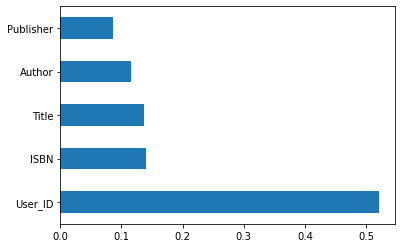

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

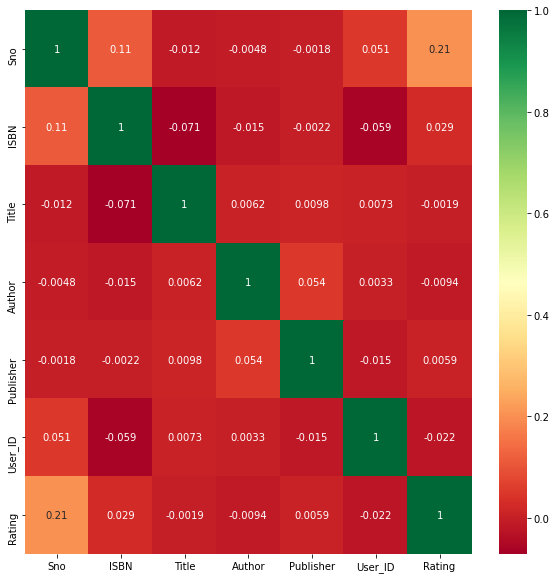

In [15]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")